In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df_email = pd.read_csv("spam_or_not_spam.csv")

In [21]:
df_email.head()

,email,Spam
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMBE...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which h...,0


In [23]:
df_email.shape

(3000, 2)

In [25]:
df_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2993 non-null   object
 1   Spam    3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [27]:
df_email.describe()

,Spam
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [29]:
df_email.isna().sum()

email    7
Spam     0
dtype: int64

In [31]:
df_email['Spam'].unique()

array([0, 1], dtype=int64)

In [33]:
df_email['Spam'].value_counts()

Spam
0    2500
1     500
Name: count, dtype: int64

<Axes: ylabel='count'>

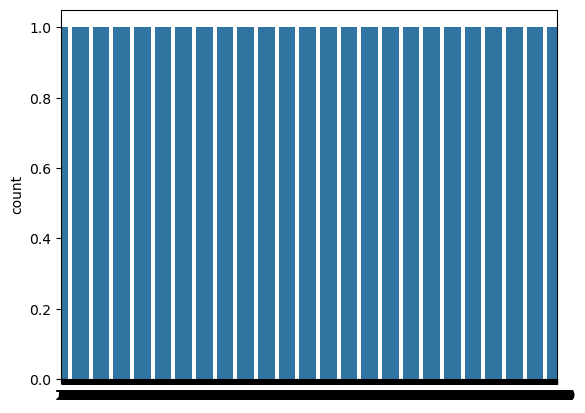

In [64]:
sns.countplot(df_email['Spam'])

## Text Preprocessing

In [37]:
import nltk

- **Tokenization**

In [66]:
from nltk import word_tokenize

def count_words(email):
    words = word_tokenize(email)
    return len(words)

In [70]:
df_email['email'] = df_email['email'].astype(str)
df_email['Count']=df_email['email'].apply(count_words)
df_email.head()

,email,Spam,Count
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMBE...,0,257
1,martin a posted tassos papadopoulos the greek ...,0,113
2,man threatens explosion in moscow thursday aug...,0,256
3,klez the virus that won t die already the most...,0,169
4,in adding cream to spaghetti carbonara which h...,0,144


In [72]:
df_email['Count']

0       257
1       113
2       256
3       169
4       144
       ... 
2995     96
2996     79
2997    154
2998    747
2999    437
Name: Count, Length: 3000, dtype: int64

In [74]:
df_email.groupby('Spam')['Count'].mean()

Spam
0    205.2332
1    303.2660
Name: Count, dtype: float64

- **Removing Punctuations and Stopwords**

In [76]:
import string
from nltk.corpus import stopwords

In [82]:
def process_text(email):
    no_punc = [char for char in email if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [89]:
df_email['email']=df_email['email'].apply(process_text)
df_email['email']

0       date wed NUMBER aug NUMBER NUMBER NUMBER NUMBE...
1       martin posted tassos papadopoulos greek sculpt...
2       man threatens explosion moscow thursday august...
3       klez virus die already prolific virus ever kle...
4       adding cream spaghetti carbonara effect pasta ...
                              ...                        
2995    abc good morning america ranks NUMBER christma...
2996    hyperlink hyperlink hyperlink let mortgage len...
2997    thank shopping us gifts occasions free gift NU...
2998    famous ebay marketing e course learn sell comp...
2999    hello chinese traditional 子 件 NUMBER世 o最有效的宣 鞣...
Name: email, Length: 3000, dtype: object

- **Stemming**

In [91]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (email):
    return ''.join([stemmer.stem(word) for word in email])

In [93]:
df_email['email']=df_email['email'].apply(stemming)
df_email.head()

,email,Spam,Count
0,date wed number aug number number number numbe...,0,257
1,martin posted tassos papadopoulos greek sculpt...,0,113
2,man threatens explosion moscow thursday august...,0,256
3,klez virus die already prolific virus ever kle...,0,169
4,adding cream spaghetti carbonara effect pasta ...,0,144


- **Bag of Words Model**

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df_email['email'])

In [97]:
#vectorizer.get_feature_names()
message_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

#### Splitting the data into train and test data

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message_bow,df_email['Spam'],test_size=0.30)

In [101]:
X_train.shape

(2100, 29024)

In [103]:
X_test.shape

(900, 29024)

## SVM Classifier

In [105]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [107]:
y_pred = svm.predict(X_test)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       751
           1       1.00      0.66      0.80       149

    accuracy                           0.94       900
   macro avg       0.97      0.83      0.88       900
weighted avg       0.95      0.94      0.94       900



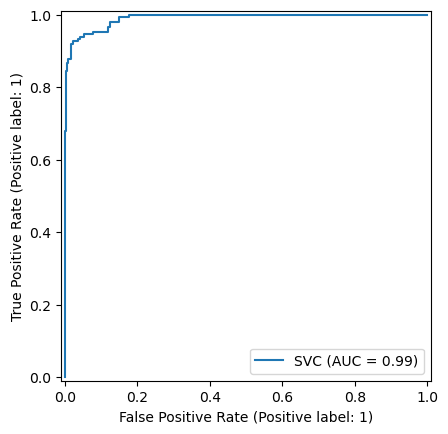

In [113]:


from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming svm is your trained model and X_test, y_test are your test data
RocCurveDisplay.from_estimator(svm, X_test, y_test)
plt.show()

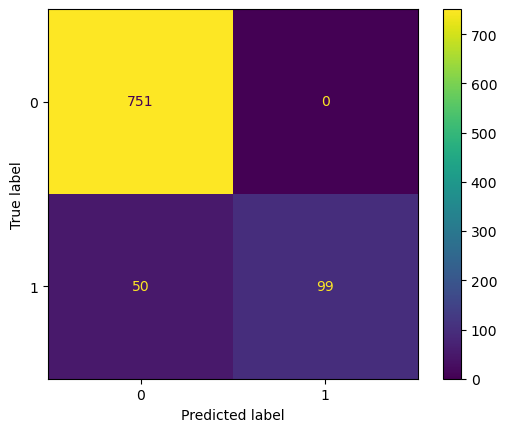

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming svm is your trained model and X_test, y_test are your test data
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.show()


- Here, Out of 1719 test data 42 are misclassified. Accuracy of the model is 98%.

- **Accuracy using Cross Validation**

In [119]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(svm,message_bow,df_email['Spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 94.63333333333333  %


## NaiveBayesMultinomial Classifier

In [121]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [123]:
y_pred = nb.predict(X_test)

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       751
           1       0.98      0.95      0.97       149

    accuracy                           0.99       900
   macro avg       0.99      0.97      0.98       900
weighted avg       0.99      0.99      0.99       900



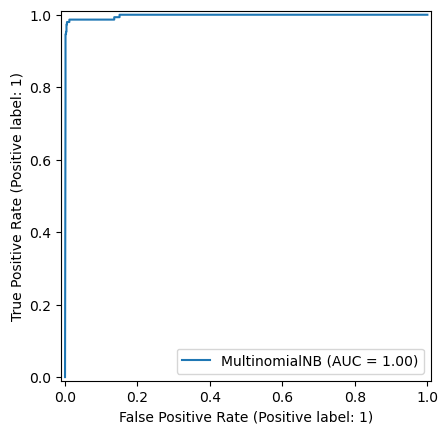

In [133]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming nb is your trained model and X_test, y_test are your test data
RocCurveDisplay.from_estimator(nb, X_test, y_test)
plt.show()


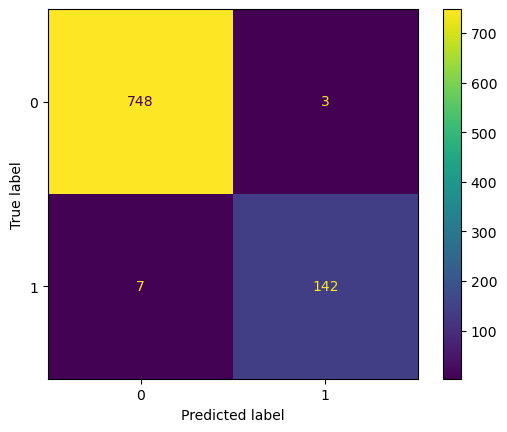

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming nb is your trained model and X_test, y_test are your test data
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)
plt.show()


- Here, Out of 1719 test data 17 are misclassified. Accuracy of the model is 99%.

- **Accuracy using Cross Validation**

In [58]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,message_bow,df_email['Spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 98.98741778885358  %
